### Считывание данных

In [37]:
import pandas as pd
data= pd.read_csv('emails.csv')
print("Письма спам или не спам, отправленные на почту:\n", data)

Письма спам или не спам, отправленные на почту:
                                                    text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]


### Преобразование данных

In [38]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

#приведение к нижнему регистру
data['text'] = data['text'].str.lower()

#функция для удаления символов !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
def del_punc(text):
    new_text = "".join([char for char in text if char not in string.punctuation])
    return new_text

#разделение предложений на слова 
def tokenize(text):
    new_text = re.split('\W+', text)
    return new_text

#удаление стоп-слов
def del_stop_words(text):
    filtered_words = [word for word in text if word not in stopwords.words('english')]
    return filtered_words

data['text'] = data['text'].apply(lambda x: del_punc(x))
data['text'] = data['text'].apply(lambda x: tokenize(x))
data['text'] = data['text'].apply(lambda x: del_stop_words(x))
new_data = data

[nltk_data] Downloading package stopwords to /Users/liza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
new_data

,text,spam
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[subject, 4, color, printing, special, request...",1
4,"[subject, money, get, software, cds, software,...",1
...,...,...
5723,"[subject, research, development, charges, gpg,...",0
5724,"[subject, receipts, visit, jim, thanks, invita...",0
5725,"[subject, enron, case, study, update, wow, day...",0
5726,"[subject, interest, david, please, call, shirl...",0


In [4]:
all_words = []
for i in data['text']:
    for k in i:
        all_words.append(k)

In [5]:
len(all_words)

884245

### Часто используемые слова

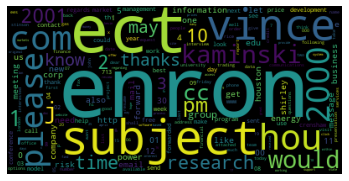

In [6]:
# Отображение частоты слов

import collections 
import wordcloud
import matplotlib.pyplot as plt

word_counts = collections.Counter(all_words) # Сделать статистику частоты слов для сегментации слов
wc = wordcloud.WordCloud(max_words=200, max_font_size=100)

wc.generate_from_frequencies(word_counts) # Создать облако слов из словаря
plt.imshow(wc) # Показать облако слов
plt.axis('off') # Закрываем ось
plt.show()

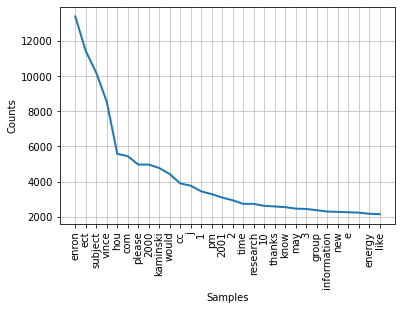

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
from nltk.probability import FreqDist
fdist = FreqDist(all_words)
fdist.plot(30,cumulative=False)

## Леммизация текста

In [47]:
from nltk.stem import  WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemm(text):
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in text])
    return lemmatized_output

new_data['text'] = new_data['text'].apply(lambda x: lemm(x))
result = new_data

In [48]:
result

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new home made easy im wan...,1
3,subject 4 color printing special request addit...,1
4,subject money get software cd software compati...,1
...,...,...
5723,subject research development charge gpg forwar...,0
5724,subject receipt visit jim thanks invitation vi...,0
5725,subject enron case study update wow day super ...,0
5726,subject interest david please call shirley cre...,0


### Расстояние Левейштейна

In [42]:
#старые данные 
test_data = pd.DataFrame()
list_text = []

for i in data['text']:
    list_text.append(' '.join(i))
test_data['text'] = list_text

In [43]:
test_data

,text
0,subject naturally irresistible corporate ident...
1,subject stock trading gunslinger fanny merrill...
2,subject unbelievable new homes made easy im wa...
3,subject 4 color printing special request addit...
4,subject money get software cds software compat...
...,...
5723,subject research development charges gpg forwa...
5724,subject receipts visit jim thanks invitation v...
5725,subject enron case study update wow day super ...
5726,subject interest david please call shirley cre...


In [45]:
#новые данные

result['text']

0       [subject, naturally, irresistible, corporate, ...
1       [subject, stock, trading, gunslinger, fanny, m...
2       [subject, unbelievable, new, home, made, easy,...
3       [subject, 4, color, printing, special, request...
4       [subject, money, get, software, cd, software, ...
                              ...                        
5723    [subject, research, development, charge, gpg, ...
5724    [subject, receipt, visit, jim, thanks, invitat...
5725    [subject, enron, case, study, update, wow, day...
5726    [subject, interest, david, please, call, shirl...
5727    [subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5728, dtype: object

In [49]:
import Levenshtein

list_distance = []
for i,j  in zip(result['text'], test_data['text']):
    list_distance.append(Levenshtein.distance(i, j))

In [50]:
list_distance

[10,
 3,
 1,
 0,
 4,
 5,
 161,
 3,
 4,
 4,
 13,
 2,
 6,
 126,
 3,
 6,
 5,
 4,
 0,
 49,
 3,
 7,
 12,
 6,
 6,
 8,
 9,
 2,
 1,
 4,
 1,
 28,
 6,
 8,
 29,
 5,
 0,
 5,
 5,
 14,
 6,
 2,
 171,
 6,
 10,
 13,
 0,
 3,
 0,
 287,
 5,
 171,
 8,
 0,
 3,
 21,
 4,
 3,
 5,
 1,
 33,
 110,
 1,
 4,
 5,
 5,
 9,
 9,
 4,
 0,
 4,
 8,
 5,
 7,
 11,
 3,
 68,
 15,
 5,
 12,
 4,
 2,
 1,
 73,
 2,
 3,
 13,
 3,
 290,
 2,
 12,
 2,
 13,
 61,
 6,
 1,
 12,
 12,
 13,
 3,
 2,
 6,
 47,
 7,
 5,
 3,
 10,
 3,
 8,
 14,
 21,
 5,
 8,
 2,
 17,
 0,
 40,
 6,
 2,
 1,
 5,
 13,
 0,
 5,
 13,
 5,
 336,
 2,
 4,
 25,
 3,
 1,
 2,
 9,
 4,
 5,
 5,
 8,
 22,
 1,
 2,
 1,
 7,
 1,
 3,
 9,
 5,
 6,
 1,
 1,
 32,
 461,
 27,
 4,
 1,
 2,
 5,
 2,
 1,
 69,
 11,
 9,
 10,
 2,
 4,
 3,
 11,
 7,
 8,
 199,
 2,
 3,
 1,
 5,
 0,
 8,
 49,
 18,
 4,
 37,
 15,
 33,
 5,
 1,
 1,
 98,
 3,
 1,
 17,
 3,
 4,
 12,
 100,
 7,
 5,
 10,
 1,
 17,
 0,
 5,
 3,
 1,
 7,
 12,
 1,
 5,
 14,
 10,
 23,
 164,
 4,
 7,
 3,
 102,
 13,
 3,
 0,
 8,
 0,
 1,
 2,
 3,
 3,
 3,
 6,
 10,
 4,
 7,
 32,
 6

### Сходство косинусов

In [93]:
list_result = []
for i, j  in zip(result['text'], test_data['text']):
    list_result.append(i)
    list_result.append(j)

In [94]:
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer().fit_transform(list_result)
vectors = vectorizer.toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [96]:
cos_ = cosine_similarity(vectors)
cos_

array([[1.        , 0.93453417, 0.0088416 , ..., 0.01764022, 0.10066532,
        0.09309493],
       [0.93453417, 1.        , 0.00907742, ..., 0.02173285, 0.0926588 ,
        0.08454968],
       [0.0088416 , 0.00907742, 1.        , ..., 0.02919717, 0.00957563,
        0.00493865],
       ...,
       [0.01764022, 0.02173285, 0.02919717, ..., 1.        , 0.01910472,
        0.01773593],
       [0.10066532, 0.0926588 , 0.00957563, ..., 0.01910472, 1.        ,
        0.86863474],
       [0.09309493, 0.08454968, 0.00493865, ..., 0.01773593, 0.86863474,
        1.        ]])

### Обучение модели

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(result['text'],result['spam'], test_size = 0.25)

In [52]:
#модель наивного байесовского для классификации текстов
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
transform_x_train = vectorizer.fit_transform(X_train)
X_test_trans = vectorizer.transform(X_test)


In [53]:
#метрики
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(transform_x_train, Y_train)

Y_pred = model.predict(X_test_trans)

print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1105
           1       0.97      0.98      0.98       327

    accuracy                           0.99      1432
   macro avg       0.98      0.99      0.98      1432
weighted avg       0.99      0.99      0.99      1432



Text(0.5, 15.0, 'Предсказанные значения')

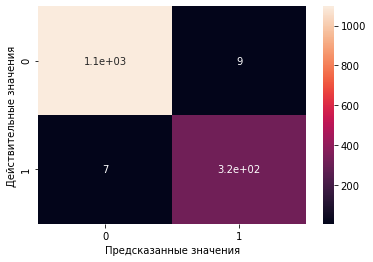

In [54]:
#графическая форма
#метод быстрого байеса

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [67]:
#метод опорных векторов
from sklearn.svm import SVC

clf = SVC(kernel="linear")

clf.fit(transform_x_train, Y_train)

Y_pred_2 = clf.predict(X_test_trans)

print(metrics.classification_report(Y_test, Y_pred_2))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1105
           1       0.95      0.97      0.96       327

    accuracy                           0.98      1432
   macro avg       0.97      0.98      0.98      1432
weighted avg       0.98      0.98      0.98      1432



Text(0.5, 15.0, 'Предсказанные значения')

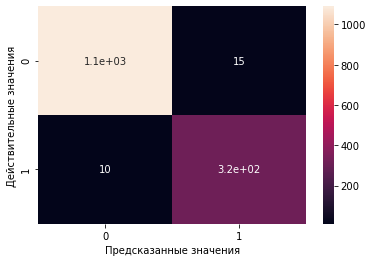

In [68]:
#графическая форма
#метод опорных векторов

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred_2)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

### Кривая обучения

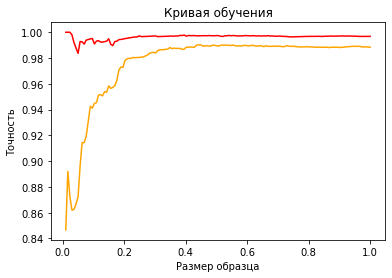

In [78]:
# кривая обучения - график зависимости тестовой и
#обучающей эффективности от размера обучающей выборки
#метод быстрого байеса

import numpy as np
from sklearn.model_selection import learning_curve

# Генерация кривой обучения
size_grid = np.linspace(0.01, 1, 150)
train_size,train_scores,validation_scores = learning_curve(MultinomialNB(),transform_x_train, Y_train,
                                                           train_sizes = size_grid, cv = 5)


# Визуализация кривой обучения
plt.figure()
plt.plot(size_grid,np.average(train_scores, axis = 1), color = 'red')
plt.plot(size_grid, np.average(validation_scores, axis = 1), color = 'orange')
plt.title('Кривая обучения')
plt.xlabel('Размер образца')
plt.ylabel('Точность')
plt.show()

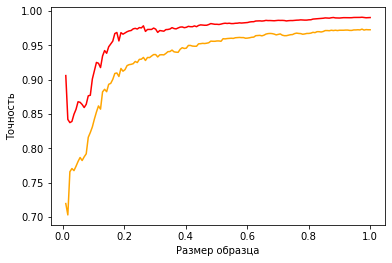

In [79]:
# кривая обучения - график зависимости тестовой и
#обучающей эффективности от размера обучающей выборки
#метод опорных веркторов

import numpy as np
from sklearn.model_selection import learning_curve


# Генерация кривой обучения
size_grid = np.linspace(0.01, 1.0, 150)
train_size,train_scores,validation_scores = learning_curve(SVC(),transform_x_train, Y_train,
                                                           train_sizes = size_grid, cv = 5)


# Визуализация кривой обучения
plt.figure()
plt.plot(size_grid,np.average(train_scores, axis = 1), color = 'red')
plt.plot(size_grid, np.average(validation_scores, axis = 1), color = 'orange')
plt.xlabel('Размер образца')
plt.ylabel('Точность')
plt.show()

### Логистическая регрессия

In [81]:
#Построим модель логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
cls = LogisticRegression()

#Обучим наш классификатор на обучающей выборке

cls.fit(transform_x_train, Y_train)

#предсказания по нашему классификатору на тестовой выборке
Y_pred_log = cls.predict(X_test_trans)

#Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации

print(metrics.classification_report(Y_test, Y_pred_log))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1105
           1       0.96      0.98      0.97       327

    accuracy                           0.99      1432
   macro avg       0.98      0.99      0.98      1432
weighted avg       0.99      0.99      0.99      1432



Text(0.5, 15.0, 'Предсказанные значения')

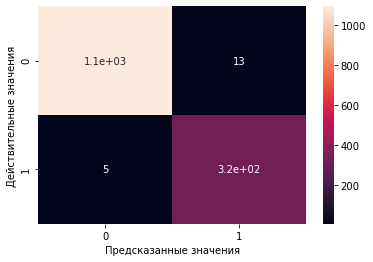

In [83]:
#графическая форма

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred_log)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

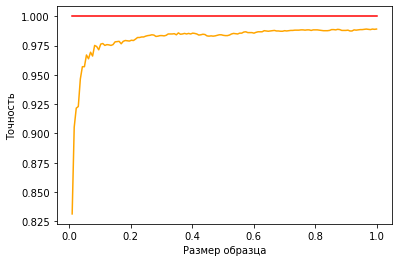

In [84]:
# кривая обучения - график зависимости тестовой и
#обучающей эффективности от размера обучающей выборки

import numpy as np
from sklearn.model_selection import learning_curve


# Генерация кривой обучения
size_grid = np.linspace(0.01, 1.0, 150)
train_size,train_scores,validation_scores = learning_curve(LogisticRegression(),transform_x_train, Y_train,
                                                           train_sizes = size_grid, cv = 5)


# Визуализация кривой обучения
plt.figure()
plt.plot(size_grid,np.average(train_scores, axis = 1), color = 'red')
plt.plot(size_grid, np.average(validation_scores, axis = 1), color = 'orange')
plt.xlabel('Размер образца')
plt.ylabel('Точность')
plt.show()

### Случайный лес

In [87]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()

regressor.fit(transform_x_train, Y_train)

#предсказания по нашему классификатору на тестовой выборке
Y_pred_reg = regressor.predict(X_test_trans)

#Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации

print(metrics.classification_report(Y_test, Y_pred_reg))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1105
           1       0.98      0.94      0.96       327

    accuracy                           0.98      1432
   macro avg       0.98      0.97      0.97      1432
weighted avg       0.98      0.98      0.98      1432



Text(0.5, 15.0, 'Предсказанные значения')

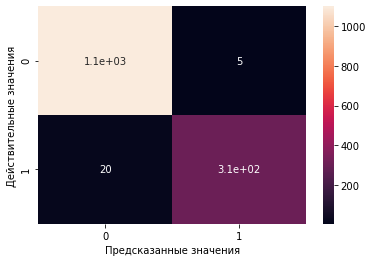

In [88]:
#графическая форма

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred_reg)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

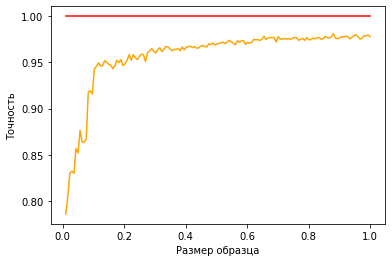

In [89]:
import numpy as np
from sklearn.model_selection import learning_curve


# Генерация кривой обучения
size_grid = np.linspace(0.01, 1.0, 150)
train_size,train_scores,validation_scores = learning_curve(RandomForestClassifier(),
                                                           transform_x_train, Y_train,
                                                           train_sizes = size_grid, cv = 5)


# Визуализация кривой обучения
plt.figure()
plt.plot(size_grid,np.average(train_scores, axis = 1), color = 'red')
plt.plot(size_grid, np.average(validation_scores, axis = 1), color = 'orange')
plt.xlabel('Размер образца')
plt.ylabel('Точность')
plt.show()

### Метод К - ближайших соседей

In [99]:
from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()
KNC.fit(transform_x_train, Y_train)

#предсказания по нашему классификатору на тестовой выборке
Y_pred_KNC = KNC.predict(X_test_trans)

#Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации

print(metrics.classification_report(Y_test, Y_pred_KNC))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1105
           1       0.92      0.63      0.75       327

    accuracy                           0.90      1432
   macro avg       0.91      0.81      0.84      1432
weighted avg       0.90      0.90      0.90      1432



Text(0.5, 15.0, 'Предсказанные значения')

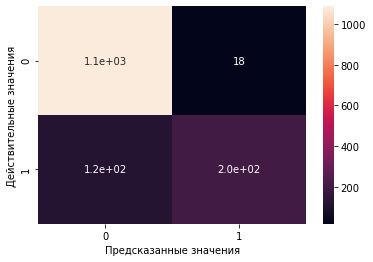

In [100]:
#графическая форма

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred_KNC)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

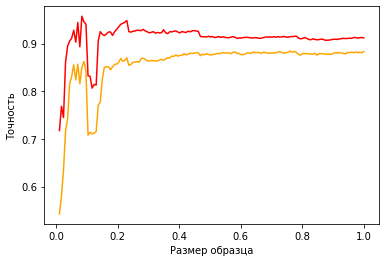

In [101]:
import numpy as np
from sklearn.model_selection import learning_curve


# Генерация кривой обучения
size_grid = np.linspace(0.01, 1.0, 150)
train_size,train_scores,validation_scores = learning_curve(KNeighborsClassifier(),
                                                           transform_x_train, Y_train,
                                                           train_sizes = size_grid, cv = 5)


# Визуализация кривой обучения
plt.figure()
plt.plot(size_grid,np.average(train_scores, axis = 1), color = 'red')
plt.plot(size_grid, np.average(validation_scores, axis = 1), color = 'orange')
plt.xlabel('Размер образца')
plt.ylabel('Точность')
plt.show()

### Классификатор дерева решений

In [102]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier()
tree_class.fit(transform_x_train, Y_train)

Y_pred_tree = tree_class.predict(X_test_trans)

#Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации

print(metrics.classification_report(Y_test, Y_pred_tree))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1105
           1       0.92      0.93      0.92       327

    accuracy                           0.97      1432
   macro avg       0.95      0.95      0.95      1432
weighted avg       0.97      0.97      0.97      1432



Text(0.5, 15.0, 'Предсказанные значения')

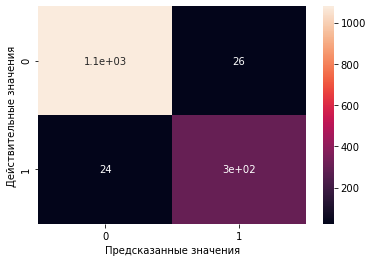

In [103]:
#графическая форма

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred_tree)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

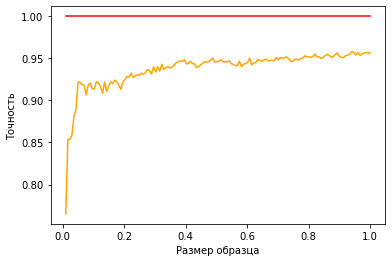

In [104]:
import numpy as np
from sklearn.model_selection import learning_curve


# Генерация кривой обучения
size_grid = np.linspace(0.01, 1.0, 150)
train_size,train_scores,validation_scores = learning_curve(DecisionTreeClassifier(),
                                                           transform_x_train, Y_train,
                                                           train_sizes = size_grid, cv = 5)


# Визуализация кривой обучения
plt.figure()
plt.plot(size_grid,np.average(train_scores, axis = 1), color = 'red')
plt.plot(size_grid, np.average(validation_scores, axis = 1), color = 'orange')
plt.xlabel('Размер образца')
plt.ylabel('Точность')
plt.show()